In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# 导入原始数据

In [15]:
data = pd.read_excel("绝对定量.xlsx")

In [16]:
data

,SPME-GC-MS数据整理,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,优级,...,二级.145,二级.146,二级.147,二级.148,二级.149,二级.150,二级.151,二级.152,二级.153,二级.154
0,数据来源,NaN,英文名称,',名称,香气阈值,香气描述,香气种类,种类,国花b1-1,...,品鉴酒特壹3,馊味1,馊味2,馊味3,盐菜味1,盐菜味2,盐菜味3,油味1,油味2,油味3
1,绝对定量,C4H8O2,Ethyl acetate,141-78-6,乙酸乙酯,32.5516,菠萝香,花果香,酯,1732.705059,...,364.895272,1245.185796,894.755975,1046.890217,1889.257101,1659.182971,1566.523843,2149.639505,1228.047178,1721.946133
2,绝对定量,C6H12O2,Ethyl butyrate,105-54-4,丁酸乙酯,0.082,苹果，热带水果,花果香,酯,83.665928,...,9.06279,NaN,NaN,NaN,22.414027,28.978696,15.587036,14.105421,NaN,9.563839
3,绝对定量,C8H16O2,Ethyl hexanoate,123-66-0,己酸乙酯,0.055,苹果皮，果香（菠萝、香蕉,花果香,酯,121.904507,...,2.506326,0.382351,0.454946,0.368615,2.015572,2.375321,1.657384,1.559074,0.849433,1.473648
4,绝对定量,C5H10O3,Ethyl lactate,97-64-3,乳酸乙酯,128,果香,花果香,酯,1469.107404,...,511.479267,2006.384933,1347.694936,1153.103415,2438.806881,1520.985427,1632.222676,1347.790594,1180.627489,1248.017149
5,绝对定量,C7H14O2,Ethyl valerate,539-82-2,戊酸乙酯,0.027,酵母，水果,花果香,酯,14.31134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,绝对定量,C11H14O2,Ethyl 3-Phenylpropionate,2021-28-5,3-苯丙酸乙酯,0.125,花香,花果香,酯,0.745147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,绝对定量,C10H12O2,Ethyl phenylacetate,101-97-3,苯乙酸乙酯,0.407,果香，甜香,花果香,酯,4.726432,...,0.331903,3.340361,3.271737,2.864392,4.34938,3.902161,3.930061,6.902885,3.090687,5.993906
8,绝对定量,C9H18O2,Ethyl heptanoate,106-30-9,庚酸乙酯,13.2,果香,花果香,酯,4.977682,...,0.809001,0.12669,0.089412,0.069372,0.389277,0.487205,0.38375,0.655618,0.239473,0.444041
9,绝对定量,C10H20O2,Etheyl octanoat,106-32-1,辛酸乙酯,0.013,果香，油脂,陈香类,酯,3.034844,...,NaN,NaN,NaN,NaN,NaN,0.615752,NaN,1.185669,NaN,1.323608


In [17]:
data_features = data.iloc[1:51, 9:]
label =  data.iloc[51, 9:].astype('int')
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#normalized_data = scaler.fit_transform(data_features)
#data_features = pd.DataFrame(normalized_data, columns=data_features.columns)

In [18]:
data_features

,优级,优级.1,优级.2,优级.3,优级.4,优级.5,优级.6,优级.7,优级.8,优级.9,...,二级.145,二级.146,二级.147,二级.148,二级.149,二级.150,二级.151,二级.152,二级.153,二级.154
1,1732.705059,2018.086575,2303.468092,1258.648023,1387.025691,1251.488982,1396.748263,1227.935645,2995.450718,3101.505124,...,364.895272,1245.185796,894.755975,1046.890217,1889.257101,1659.182971,1566.523843,2149.639505,1228.047178,1721.946133
2,83.665928,82.087008,80.508089,71.87946,94.247899,59.190194,47.647027,33.112137,30.793839,199.639551,...,9.06279,NaN,NaN,NaN,22.414027,28.978696,15.587036,14.105421,NaN,9.563839
3,121.904507,100.882778,79.861049,112.643313,64.740792,88.847147,57.2963,51.351464,44.303057,326.003583,...,2.506326,0.382351,0.454946,0.368615,2.015572,2.375321,1.657384,1.559074,0.849433,1.473648
4,1469.107404,1407.859381,1346.611357,1346.611357,1552.620305,1952.620305,2190.823981,2855.800424,1891.918741,704.796755,...,511.479267,2006.384933,1347.694936,1153.103415,2438.806881,1520.985427,1632.222676,1347.790594,1180.627489,1248.017149
5,14.31134,14.326486,14.341632,16.795242,12.250449,15.016997,8.198113,7.346333,6.000742,36.947785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.745147,0.73983,0.734513,0.642001,0.520835,0.596318,0.510292,0.503149,0.58296,0.558561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.726432,4.659492,4.592552,3.756254,3.204825,3.438491,3.634591,3.561278,3.823296,1.10626,...,0.331903,3.340361,3.271737,2.864392,4.34938,3.902161,3.930061,6.902885,3.090687,5.993906
8,4.977682,3.630818,2.283954,5.144619,1.774973,4.163606,2.444262,2.024977,63.815717,6.041317,...,0.809001,0.12669,0.089412,0.069372,0.389277,0.487205,0.38375,0.655618,0.239473,0.444041
9,3.034844,1.831923,0.629003,2.879982,0.671477,1.950536,1.639921,1.366852,5.804821,13.739739,...,NaN,NaN,NaN,NaN,NaN,0.615752,NaN,1.185669,NaN,1.323608
10,0.516896,0.358115,0.199335,0.572264,0.048756,0.437744,0.378466,0.358626,0.164343,0.09809,...,0.06215,0.074204,NaN,NaN,0.099555,0.185075,0.080584,0.200052,0.065325,0.221296


In [19]:
#优级的回归填充，173个优级样本数据
data_0 = data_features.iloc[:,:173]

In [20]:
data_0 = data_0.fillna('NA')

In [21]:
data_0

,优级,优级.1,优级.2,优级.3,优级.4,优级.5,优级.6,优级.7,优级.8,优级.9,...,优级.163,优级.164,优级.165,优级.166,优级.167,优级.168,优级.169,优级.170,优级.171,优级.172
1,1732.705059,2018.086575,2303.468092,1258.648023,1387.025691,1251.488982,1396.748263,1227.935645,2995.450718,3101.505124,...,1022.701712,869.733475,862.286704,806.374848,961.472542,1056.177929,972.421737,920.516173,1215.556828,1054.525486
2,83.665928,82.087008,80.508089,71.87946,94.247899,59.190194,47.647027,33.112137,30.793839,199.639551,...,123.691972,49.867196,48.480968,50.119229,55.261259,55.842284,59.166356,25.939765,42.280744,35.597249
3,121.904507,100.882778,79.861049,112.643313,64.740792,88.847147,57.2963,51.351464,44.303057,326.003583,...,19.602311,13.462208,12.536636,13.166429,16.564602,17.581184,19.176965,2.066387,3.27963,2.729388
4,1469.107404,1407.859381,1346.611357,1346.611357,1552.620305,1952.620305,2190.823981,2855.800424,1891.918741,704.796755,...,247.26324,351.990961,263.92789,440.054032,495.098015,570.807243,584.863065,997.326906,635.055597,590.55411
5,14.31134,14.326486,14.341632,16.795242,12.250449,15.016997,8.198113,7.346333,6.000742,36.947785,...,35.020881,26.53477,24.518004,26.782485,29.604048,30.034266,33.648773,2.280284,4.904572,3.640361
6,0.745147,0.73983,0.734513,0.642001,0.520835,0.596318,0.510292,0.503149,0.58296,0.558561,...,0.189029,0.044598,0.058314,0.042891,0.116197,0.166553,0.144128,0.004347,0.063172,0.04487
7,4.726432,4.659492,4.592552,3.756254,3.204825,3.438491,3.634591,3.561278,3.823296,1.10626,...,2.066328,2.103469,2.414192,2.135788,1.666707,2.031212,1.794602,2.891911,4.665048,4.089281
8,4.977682,3.630818,2.283954,5.144619,1.774973,4.163606,2.444262,2.024977,63.815717,6.041317,...,7.142994,6.663457,5.901739,6.600167,8.016273,9.092312,10.172968,0.568977,0.94142,0.758073
9,3.034844,1.831923,0.629003,2.879982,0.671477,1.950536,1.639921,1.366852,5.804821,13.739739,...,16.346308,13.047315,11.502953,12.024039,15.316844,20.319268,21.405982,3.971618,6.294081,5.507159
10,0.516896,0.358115,0.199335,0.572264,0.048756,0.437744,0.378466,0.358626,0.164343,0.09809,...,0.731315,0.558002,0.508745,0.485299,0.381307,0.602389,0.606276,0.45318,0.635641,0.568042


# 以下为回归过程的调试工作（可以跳过）

In [6]:
label.shape

(418,)

In [7]:
#填充丁酸丁酯（第21列）
data_features.iloc[20,:]

优级        0.000280
优级.1      0.000155
优级.2      0.000063
优级.3      0.000334
优级.4      0.000070
            ...   
二级.150    0.000182
二级.151    0.000117
二级.152    0.000105
二级.153    0.000047
二级.154    0.000073
Name: 20, Length: 418, dtype: float64

In [12]:
import math
type(data_0.iloc[20,6])
data_0.iloc[20,6] == 'NA'

True

In [13]:
#制作训练集和测试集
x_train = []
y_train = []
test = []
for i in range(173):
    if(data_0.iloc[20,i]=='NA'):
        selected_data = data_0.iloc[data_0.index != 20, i].tolist()#不是空值的数据加入测试集
        test.append(selected_data)
    else:
        selected_data = data_0.iloc[data_0.index != 20, i].tolist()
        selected_label = data_0.iloc[20, i]
        x_train.append(selected_data)
        y_train.append(selected_label)
        
        

In [14]:
len(x_train[0])

49

In [15]:
len(y_train)

122

In [16]:
#训练集是空值的设为0
for i in x_train:
    for j in range(49):
        if(i[j]=='NA'):
            i[j] = 0

In [17]:
x_train[0]

[1.0,
 0.04827764615008852,
 0.0703465650628424,
 0.847867903587466,
 0.008250511217393747,
 0.0004209524300547211,
 0.002718701346311916,
 0.0028637068827214924,
 0.0017424223692842989,
 0.00028922002134660046,
 0.0005544499465733909,
 0.0,
 0.000270491313425872,
 0.006129970687348533,
 0.015908772459061016,
 0.032064457040294425,
 0.004420671688668549,
 0.007340680332857305,
 0.008542041029002696,
 0.0003809059993637076,
 4.3775658333911975e-05,
 0.0004449649661448595,
 0.002222897897990535,
 0.0009023428157892582,
 0.0007131436227683478,
 0,
 0,
 0.00032872427093144624,
 0.001588961224478125,
 5.2022038861598426e-05,
 0.00011929271258782521,
 0,
 0.00032636688311720987,
 0.7626556745825382,
 0.011093295736971931,
 0.007405562807565304,
 0.047005222514741554,
 0.0002920300701662518,
 0.0036008696434566253,
 0.0003646067900089719,
 0.0004701014044410336,
 0,
 0,
 0,
 0.011123673791295563,
 0.16128643515223717,
 0.07405555687348049,
 0,
 0.003492713603411616]

In [18]:
for i in test:
    for j in range(49):
        if(i[j]=='NA'):
            i[j] = 0

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train) 
test = np.array(test) 

In [20]:
type(test)

numpy.ndarray

In [21]:
test.shape

(51, 49)

In [22]:
test[0].reshape(-1,1)

array([[6.37542329e-01],
       [2.17419953e-02],
       [2.61464279e-02],
       [1.00000000e+00],
       [3.73544845e-03],
       [2.26324888e-04],
       [1.65241835e-03],
       [1.10909012e-03],
       [7.41946914e-04],
       [1.66152581e-04],
       [7.63758768e-04],
       [2.52597316e-02],
       [2.03228270e-04],
       [1.20008465e-01],
       [1.77593967e-02],
       [9.75164978e-06],
       [4.01067597e-03],
       [9.20491863e-03],
       [0.00000000e+00],
       [9.17212481e-06],
       [2.65640083e-05],
       [6.74926855e-05],
       [2.67139306e-03],
       [3.06381392e-03],
       [1.37249778e-03],
       [1.41341691e-03],
       [2.17292392e-04],
       [3.39922558e-04],
       [1.59385445e-03],
       [2.99410016e-05],
       [4.97902320e-05],
       [0.00000000e+00],
       [4.55021219e-04],
       [6.75245358e-01],
       [2.55492927e-03],
       [2.63213180e-03],
       [2.98374772e-01],
       [1.40568203e-04],
       [2.26831481e-03],
       [0.00000000e+00],


In [23]:
knn= KNeighborsRegressor(n_neighbors = 3, weights = "distance")
    
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [24]:
y_pred = knn.predict(test)

In [25]:
y_pred

array([2.48124432e-04, 2.16683211e-04, 1.11020962e-04, 1.09846588e-04,
       1.31117487e-04, 3.83646571e-04, 1.56791171e-04, 5.81640658e-04,
       5.92434798e-04, 4.47684412e-05, 2.12222437e-04, 1.56276921e-04,
       2.16017466e-04, 2.40327735e-04, 1.92618133e-04, 2.40055915e-04,
       2.79388127e-04, 1.45590332e-05, 1.20676290e-04, 9.78586414e-05,
       1.24180444e-04, 8.05049850e-05, 9.36746714e-05, 1.06730854e-04,
       2.16043750e-04, 1.56190196e-04, 7.62956238e-05, 7.60872711e-05,
       1.91770446e-04, 8.38361288e-05, 9.03334305e-05, 1.73997342e-04,
       9.49650683e-05, 1.40475359e-04, 1.05519113e-04, 8.85133733e-05,
       6.88547616e-05, 5.73125054e-04, 7.26226870e-05, 6.70921820e-05,
       5.27092708e-05, 5.93047478e-05, 1.13707562e-04, 6.26129627e-05,
       1.41703943e-04, 8.72947105e-05, 8.66280502e-05, 2.58829012e-04,
       6.75720177e-04, 1.70058438e-05, 1.69950136e-05])

In [26]:
j=0
for i in range(173):
    if(data_0.iloc[20,i]=='NA'):
        data_0.iloc[20,i] = y_pred[j]
        j+=1

In [28]:
data_0.iloc[20,6]

0.0002481244320550438

# 根据以上调试，写一个总体过程的函数

In [22]:
#判断这一行是否有NA，如果没有则可以跳过填充过程
def is_NAN(data_0,col,num):
    flag = False
    for i in range(num):
        if(data_0.iloc[col,i]=='NA'):
            flag = True
            break
    return flag

In [23]:
def KNN_fillna(data_0,col,num):#数据集，行索引值，样本数
    x_train = []
    y_train = []
    test = []
    for i in range(num):
        if(data_0.iloc[col,i]=='NA'):
            selected_data = data_0.iloc[data_0.index != col, i].tolist()#不是空值的数据加入测试集
            test.append(selected_data)
        else:
                selected_data = data_0.iloc[data_0.index != col, i].tolist()
                selected_label = data_0.iloc[col, i]
                x_train.append(selected_data)
                y_train.append(selected_label)
    #训练集是空值的设为0
    for i in x_train:
        for j in range(49):
            if(i[j]=='NA'):
                i[j] = 0
    for i in test:
        for j in range(49):
            if(i[j]=='NA'):
                i[j] = 0
    #转为numpy数组
    x_train = np.array(x_train)
    y_train = np.array(y_train) 
    test = np.array(test) 
    #print(x_train.shape)
    #KNN训练
    knn= KNeighborsRegressor(n_neighbors = 3, weights = "distance")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(test)
        
    k=0
    for i in range(num):
        if(data_0.iloc[col,i]=='NA'):
             data_0.iloc[col,i] = y_pred[k]
             k+=1
        

# 特级酒的NA填充

In [24]:
#填充循环，从第一行到最后一行，0-49
for col in range(50):
    flag = is_NAN(data_0,col,173)
    if(flag==True):
        KNN_fillna(data_0,col,173)

In [25]:
data_0

,优级,优级.1,优级.2,优级.3,优级.4,优级.5,优级.6,优级.7,优级.8,优级.9,...,优级.163,优级.164,优级.165,优级.166,优级.167,优级.168,优级.169,优级.170,优级.171,优级.172
1,1732.705059,2018.086575,2303.468092,1258.648023,1387.025691,1251.488982,1396.748263,1227.935645,2995.450718,3101.505124,...,1022.701712,869.733475,862.286704,806.374848,961.472542,1056.177929,972.421737,920.516173,1215.556828,1054.525486
2,83.665928,82.087008,80.508089,71.87946,94.247899,59.190194,47.647027,33.112137,30.793839,199.639551,...,123.691972,49.867196,48.480968,50.119229,55.261259,55.842284,59.166356,25.939765,42.280744,35.597249
3,121.904507,100.882778,79.861049,112.643313,64.740792,88.847147,57.2963,51.351464,44.303057,326.003583,...,19.602311,13.462208,12.536636,13.166429,16.564602,17.581184,19.176965,2.066387,3.27963,2.729388
4,1469.107404,1407.859381,1346.611357,1346.611357,1552.620305,1952.620305,2190.823981,2855.800424,1891.918741,704.796755,...,247.26324,351.990961,263.92789,440.054032,495.098015,570.807243,584.863065,997.326906,635.055597,590.55411
5,14.31134,14.326486,14.341632,16.795242,12.250449,15.016997,8.198113,7.346333,6.000742,36.947785,...,35.020881,26.53477,24.518004,26.782485,29.604048,30.034266,33.648773,2.280284,4.904572,3.640361
6,0.745147,0.73983,0.734513,0.642001,0.520835,0.596318,0.510292,0.503149,0.58296,0.558561,...,0.189029,0.044598,0.058314,0.042891,0.116197,0.166553,0.144128,0.004347,0.063172,0.04487
7,4.726432,4.659492,4.592552,3.756254,3.204825,3.438491,3.634591,3.561278,3.823296,1.10626,...,2.066328,2.103469,2.414192,2.135788,1.666707,2.031212,1.794602,2.891911,4.665048,4.089281
8,4.977682,3.630818,2.283954,5.144619,1.774973,4.163606,2.444262,2.024977,63.815717,6.041317,...,7.142994,6.663457,5.901739,6.600167,8.016273,9.092312,10.172968,0.568977,0.94142,0.758073
9,3.034844,1.831923,0.629003,2.879982,0.671477,1.950536,1.639921,1.366852,5.804821,13.739739,...,16.346308,13.047315,11.502953,12.024039,15.316844,20.319268,21.405982,3.971618,6.294081,5.507159
10,0.516896,0.358115,0.199335,0.572264,0.048756,0.437744,0.378466,0.358626,0.164343,0.09809,...,0.731315,0.558002,0.508745,0.485299,0.381307,0.602389,0.606276,0.45318,0.635641,0.568042


In [26]:
data_0.to_csv('KNN_0.csv', index=True, encoding='utf-8')

# 一级酒

In [31]:
data_1 = data_features.iloc[:,173:173+90]

In [32]:
data_1

,一级,一级.1,一级.2,一级.3,一级.4,一级.5,一级.6,一级.7,一级.8,一级.9,...,一级.80,一级.81,一级.82,一级.83,一级.84,一级.85,一级.86,一级.87,一级.88,一级.89
1,990.5183,1059.80055,1039.541359,1001.443552,1118.959331,1044.213006,1090.526521,949.452939,658.009032,1036.425892,...,1406.543048,1165.771823,1311.28416,1092.473081,1786.948401,1330.451568,2022.437285,1329.125718,2366.724525,1516.839011
2,28.136678,34.56097,32.426323,89.192732,96.244582,97.092969,78.878188,71.4551,33.49239,105.86059,...,23.056574,18.436161,21.612027,16.125991,127.313528,89.001356,175.119568,31.555227,72.328357,27.187133
3,2.706128,3.188001,3.087965,8.65148,9.085916,9.337316,10.522122,10.184805,5.749942,10.680184,...,2.441346,2.831494,2.924895,2.321197,3.16627,2.067804,4.315394,4.265943,7.311758,3.707969
4,761.866067,700.608624,722.127339,307.003041,386.063229,326.103263,358.053182,325.621257,937.747935,569.787368,...,1102.156915,858.235204,861.375053,644.045666,1733.976777,1204.921483,1427.859893,1945.964802,2113.90584,2157.881859
5,3.555264,4.786492,4.560207,15.666351,16.755722,17.194689,17.421551,17.002741,0.825441,33.566119,...,NaN,NaN,NaN,NaN,11.063413,4.98987,18.058027,1.221602,7.974955,NaN
6,NaN,0.011878,0.003497,0.126032,0.099144,0.161484,0.091049,0.088834,0.027088,0.097416,...,NaN,NaN,NaN,NaN,0.065027,NaN,0.125488,NaN,0.167077,0.019171
7,1.913574,2.6436,2.588604,2.546209,2.535526,2.892666,2.14036,2.006268,1.069725,2.433962,...,1.476579,2.930255,3.083887,1.487947,4.492892,2.759272,5.382996,2.961117,6.077007,3.734494
8,0.950268,1.071683,1.035971,2.772011,2.773193,2.863551,3.954811,3.961878,2.210095,5.496571,...,0.674968,1.086983,0.993663,0.704861,1.123925,0.729639,1.509131,0.925945,1.394933,0.680478
9,5.100678,5.97489,5.826737,6.323081,6.525272,6.785002,11.115295,10.917583,5.948266,9.566916,...,0.424065,2.040134,2.048702,0.109654,3.129327,1.006653,4.87141,1.008142,3.50091,0.647755
10,0.487383,0.608093,0.519511,0.3634,0.402776,0.367908,0.472069,0.448062,0.253164,0.552877,...,0.083217,0.086503,0.090814,0.017687,0.410669,0.23322,0.533898,0.231713,0.38693,0.226721


In [35]:
data_1 = data_1.fillna('NA')

In [36]:
for col in range(50):
    flag = is_NAN(data_1,col,90)
    if(flag==True):
        KNN_fillna(data_1,col,90)

In [37]:
data_1

,一级,一级.1,一级.2,一级.3,一级.4,一级.5,一级.6,一级.7,一级.8,一级.9,...,一级.80,一级.81,一级.82,一级.83,一级.84,一级.85,一级.86,一级.87,一级.88,一级.89
1,990.5183,1059.80055,1039.541359,1001.443552,1118.959331,1044.213006,1090.526521,949.452939,658.009032,1036.425892,...,1406.543048,1165.771823,1311.28416,1092.473081,1786.948401,1330.451568,2022.437285,1329.125718,2366.724525,1516.839011
2,28.136678,34.56097,32.426323,89.192732,96.244582,97.092969,78.878188,71.4551,33.49239,105.86059,...,23.056574,18.436161,21.612027,16.125991,127.313528,89.001356,175.119568,31.555227,72.328357,27.187133
3,2.706128,3.188001,3.087965,8.65148,9.085916,9.337316,10.522122,10.184805,5.749942,10.680184,...,2.441346,2.831494,2.924895,2.321197,3.16627,2.067804,4.315394,4.265943,7.311758,3.707969
4,761.866067,700.608624,722.127339,307.003041,386.063229,326.103263,358.053182,325.621257,937.747935,569.787368,...,1102.156915,858.235204,861.375053,644.045666,1733.976777,1204.921483,1427.859893,1945.964802,2113.90584,2157.881859
5,3.555264,4.786492,4.560207,15.666351,16.755722,17.194689,17.421551,17.002741,0.825441,33.566119,...,18.662543,4.77788,3.967173,4.559708,11.063413,4.98987,18.058027,1.221602,7.974955,5.129467
6,0.020989,0.011878,0.003497,0.126032,0.099144,0.161484,0.091049,0.088834,0.027088,0.097416,...,0.037497,0.075138,0.076031,0.109185,0.065027,0.130113,0.125488,0.024964,0.167077,0.019171
7,1.913574,2.6436,2.588604,2.546209,2.535526,2.892666,2.14036,2.006268,1.069725,2.433962,...,1.476579,2.930255,3.083887,1.487947,4.492892,2.759272,5.382996,2.961117,6.077007,3.734494
8,0.950268,1.071683,1.035971,2.772011,2.773193,2.863551,3.954811,3.961878,2.210095,5.496571,...,0.674968,1.086983,0.993663,0.704861,1.123925,0.729639,1.509131,0.925945,1.394933,0.680478
9,5.100678,5.97489,5.826737,6.323081,6.525272,6.785002,11.115295,10.917583,5.948266,9.566916,...,0.424065,2.040134,2.048702,0.109654,3.129327,1.006653,4.87141,1.008142,3.50091,0.647755
10,0.487383,0.608093,0.519511,0.3634,0.402776,0.367908,0.472069,0.448062,0.253164,0.552877,...,0.083217,0.086503,0.090814,0.017687,0.410669,0.23322,0.533898,0.231713,0.38693,0.226721


In [39]:
data_1.to_csv('KNN_1.csv', index=True, encoding='utf-8')

# 二级

In [38]:
data_2 = data_features.iloc[:,173+90:]
data_2

,二级,二级.1,二级.2,二级.3,二级.4,二级.5,二级.6,二级.7,二级.8,二级.9,...,二级.145,二级.146,二级.147,二级.148,二级.149,二级.150,二级.151,二级.152,二级.153,二级.154
1,2332.761876,2351.925353,1313.141316,3157.941785,1550.775157,3532.547244,1530.045223,2225.886487,3091.729648,1864.364597,...,364.895272,1245.185796,894.755975,1046.890217,1889.257101,1659.182971,1566.523843,2149.639505,1228.047178,1721.946133
2,220.283334,254.327814,80.592239,268.226254,94.436782,225.426374,51.058009,117.555532,227.919523,144.869624,...,9.06279,NaN,NaN,NaN,22.414027,28.978696,15.587036,14.105421,NaN,9.563839
3,18.56857,23.956796,9.52692,12.197257,3.972849,7.43558,6.690725,14.112993,12.674675,60.9409,...,2.506326,0.382351,0.454946,0.368615,2.015572,2.375321,1.657384,1.559074,0.849433,1.473648
4,1138.655111,1478.154133,1696.648152,1344.961074,1610.887897,1804.127806,934.232271,1159.457939,898.383641,1301.911754,...,511.479267,2006.384933,1347.694936,1153.103415,2438.806881,1520.985427,1632.222676,1347.790594,1180.627489,1248.017149
5,51.562228,27.632223,17.187461,39.246855,0.190172,22.643603,1.909765,23.034764,30.268046,133.022854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.153195,0.280478,0.014981,0.39969,NaN,0.242178,NaN,0.045889,0.108194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.908532,5.440625,2.505696,7.390089,2.534359,6.503732,1.292138,2.920925,3.682842,1.270393,...,0.331903,3.340361,3.271737,2.864392,4.34938,3.902161,3.930061,6.902885,3.090687,5.993906
8,6.642721,8.57443,3.451768,3.437973,1.015635,1.748163,2.743748,5.935417,6.191976,4.054034,...,0.809001,0.12669,0.089412,0.069372,0.389277,0.487205,0.38375,0.655618,0.239473,0.444041
9,16.993601,22.178229,8.289339,12.835869,2.092,5.537422,3.094444,8.732842,9.239062,3.716573,...,NaN,NaN,NaN,NaN,NaN,0.615752,NaN,1.185669,NaN,1.323608
10,0.640337,0.956758,0.370305,0.998762,0.277648,0.494375,0.143766,0.301348,0.272531,0.190723,...,0.06215,0.074204,NaN,NaN,0.099555,0.185075,0.080584,0.200052,0.065325,0.221296


In [41]:
data_2 = data_2.fillna('NA')
for col in range(50):
    flag = is_NAN(data_2,col,155)
    if(flag==True):
        KNN_fillna(data_2,col,155)

In [42]:
data_2

,二级,二级.1,二级.2,二级.3,二级.4,二级.5,二级.6,二级.7,二级.8,二级.9,...,二级.145,二级.146,二级.147,二级.148,二级.149,二级.150,二级.151,二级.152,二级.153,二级.154
1,2332.761876,2351.925353,1313.141316,3157.941785,1550.775157,3532.547244,1530.045223,2225.886487,3091.729648,1864.364597,...,364.895272,1245.185796,894.755975,1046.890217,1889.257101,1659.182971,1566.523843,2149.639505,1228.047178,1721.946133
2,220.283334,254.327814,80.592239,268.226254,94.436782,225.426374,51.058009,117.555532,227.919523,144.869624,...,9.06279,68.769097,20.050089,45.393811,22.414027,28.978696,15.587036,14.105421,13.588979,9.563839
3,18.56857,23.956796,9.52692,12.197257,3.972849,7.43558,6.690725,14.112993,12.674675,60.9409,...,2.506326,0.382351,0.454946,0.368615,2.015572,2.375321,1.657384,1.559074,0.849433,1.473648
4,1138.655111,1478.154133,1696.648152,1344.961074,1610.887897,1804.127806,934.232271,1159.457939,898.383641,1301.911754,...,511.479267,2006.384933,1347.694936,1153.103415,2438.806881,1520.985427,1632.222676,1347.790594,1180.627489,1248.017149
5,51.562228,27.632223,17.187461,39.246855,0.190172,22.643603,1.909765,23.034764,30.268046,133.022854,...,3.728835,9.488261,16.909604,4.856494,30.16471,5.080916,9.624355,18.180634,9.180595,10.704631
6,0.153195,0.280478,0.014981,0.39969,0.188166,0.242178,0.049217,0.045889,0.108194,0.056922,...,0.071174,0.076514,0.136483,0.134858,0.070063,0.121024,0.105149,0.163271,0.066304,0.100914
7,3.908532,5.440625,2.505696,7.390089,2.534359,6.503732,1.292138,2.920925,3.682842,1.270393,...,0.331903,3.340361,3.271737,2.864392,4.34938,3.902161,3.930061,6.902885,3.090687,5.993906
8,6.642721,8.57443,3.451768,3.437973,1.015635,1.748163,2.743748,5.935417,6.191976,4.054034,...,0.809001,0.12669,0.089412,0.069372,0.389277,0.487205,0.38375,0.655618,0.239473,0.444041
9,16.993601,22.178229,8.289339,12.835869,2.092,5.537422,3.094444,8.732842,9.239062,3.716573,...,1.835647,6.399173,0.954702,0.602975,6.090238,0.615752,3.208904,1.185669,2.131474,1.323608
10,0.640337,0.956758,0.370305,0.998762,0.277648,0.494375,0.143766,0.301348,0.272531,0.190723,...,0.06215,0.074204,0.026338,0.041034,0.099555,0.185075,0.080584,0.200052,0.065325,0.221296


In [43]:
data_2.to_csv('KNN_2.csv', index=True, encoding='utf-8')

# 应用

In [48]:
data_KNN = pd.read_excel("KNN_data.xlsx")

In [49]:
data_KNN

,优级,优级.1,优级.2,优级.3,优级.4,优级.5,优级.6,优级.7,优级.8,优级.9,...,二级.145,二级.146,二级.147,二级.148,二级.149,二级.150,二级.151,二级.152,二级.153,二级.154
0,1732.705059,2018.086575,2303.468092,1258.648023,1387.025691,1251.488982,1396.748263,1227.935645,2995.450718,3101.505124,...,364.895272,1245.185796,894.755975,1046.890217,1889.257101,1659.182971,1566.523843,2149.639505,1228.047178,1721.946133
1,83.665928,82.087008,80.508089,71.879460,94.247899,59.190194,47.647027,33.112137,30.793839,199.639551,...,9.062790,68.769097,20.050089,45.393811,22.414027,28.978696,15.587036,14.105421,13.588979,9.563839
2,121.904507,100.882778,79.861049,112.643313,64.740792,88.847147,57.296300,51.351464,44.303057,326.003583,...,2.506326,0.382351,0.454946,0.368615,2.015572,2.375321,1.657384,1.559074,0.849433,1.473648
3,1469.107404,1407.859381,1346.611357,1346.611357,1552.620305,1952.620305,2190.823981,2855.800424,1891.918741,704.796755,...,511.479267,2006.384933,1347.694936,1153.103415,2438.806881,1520.985427,1632.222676,1347.790594,1180.627489,1248.017149
4,14.311340,14.326486,14.341632,16.795242,12.250449,15.016997,8.198113,7.346333,6.000742,36.947785,...,3.728835,9.488261,16.909604,4.856494,30.164710,5.080916,9.624355,18.180634,9.180595,10.704631
5,0.745147,0.739830,0.734513,0.642001,0.520835,0.596318,0.510292,0.503149,0.582960,0.558561,...,0.071174,0.076514,0.136483,0.134858,0.070063,0.121024,0.105149,0.163271,0.066304,0.100914
6,4.726432,4.659492,4.592552,3.756254,3.204825,3.438491,3.634591,3.561278,3.823296,1.106260,...,0.331903,3.340361,3.271737,2.864392,4.349380,3.902161,3.930061,6.902885,3.090687,5.993906
7,4.977682,3.630818,2.283954,5.144619,1.774973,4.163606,2.444262,2.024977,63.815717,6.041317,...,0.809001,0.126690,0.089412,0.069372,0.389277,0.487205,0.383750,0.655618,0.239473,0.444041
8,3.034844,1.831923,0.629003,2.879982,0.671477,1.950536,1.639921,1.366852,5.804821,13.739739,...,1.835647,6.399173,0.954702,0.602975,6.090238,0.615752,3.208904,1.185669,2.131474,1.323608
9,0.516896,0.358115,0.199335,0.572264,0.048756,0.437744,0.378466,0.358626,0.164343,0.098090,...,0.062150,0.074204,0.026338,0.041034,0.099555,0.185075,0.080584,0.200052,0.065325,0.221296


In [54]:
X = data_KNN.iloc[:50,:]
y = data_KNN.iloc[50,:].astype('int')

In [66]:
X.T.shape

(418, 50)

In [67]:
X = X.T

In [68]:
y

优级        0
优级.1      0
优级.2      0
优级.3      0
优级.4      0
         ..
二级.150    2
二级.151    2
二级.152    2
二级.153    2
二级.154    2
Name: 50, Length: 418, dtype: int64

In [56]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=520, shuffle=True)

In [69]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [70]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
优级,1732.705059,83.665928,121.904507,1469.107404,14.311340,0.745147,4.726432,4.977682,3.034844,0.516896,...,0.647518,0.830307,0.018729,3.435353,0.509266,19.289638,279.475046,128.331038,0.293731,6.067555
优级.2,2303.468092,80.508089,79.861049,1346.611357,14.341632,0.734513,4.592552,2.283954,0.629003,0.199335,...,0.591530,1.001459,0.021733,3.888528,0.448028,19.660199,320.548927,137.162036,0.303177,5.652325
优级.3,1258.648023,71.879460,112.643313,1346.611357,16.795242,0.642001,3.756254,5.144619,2.879982,0.572264,...,0.223863,0.114214,0.033404,2.992662,0.437427,15.783401,382.207901,145.065852,0.357149,5.785986
优级.4,1387.025691,94.247899,64.740792,1552.620305,12.250449,0.520835,3.204825,1.774973,0.671477,0.048756,...,0.490728,0.814176,0.032318,2.777817,0.399225,17.033966,376.924835,154.462292,0.289302,3.019002
优级.6,1396.748263,47.647027,57.296300,2190.823981,8.198113,0.510292,3.634591,2.444262,1.639921,0.378466,...,1.424234,0.043327,0.028977,2.503379,0.637975,16.751000,356.744055,114.343087,0.329441,0.352373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
二级.149,1889.257101,22.414027,2.015572,2438.806881,30.164710,0.070063,4.349380,0.389277,6.090238,0.099555,...,0.407513,0.016049,0.017673,4.296396,0.844529,2.574481,40.800504,64.648497,0.055959,0.045220
二级.151,1566.523843,15.587036,1.657384,1632.222676,9.624355,0.105149,3.930061,0.383750,3.208904,0.080584,...,0.248147,0.012556,0.008697,3.196536,0.366352,1.550099,10.436870,51.082051,0.059531,0.092028
二级.152,2149.639505,14.105421,1.559074,1347.790594,18.180634,0.163271,6.902885,0.655618,1.185669,0.200052,...,0.444878,0.034583,0.005288,3.889911,0.468196,5.096623,223.720941,133.315463,0.095163,0.086931
二级.153,1228.047178,13.588979,0.849433,1180.627489,9.180595,0.066304,3.090687,0.239473,2.131474,0.065325,...,0.202403,0.016436,0.002489,1.937841,0.273514,1.864910,168.335826,123.646734,0.058169,0.047740


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, f1_score, precision_score

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),learning_rate=0.01) # 初始化
abc.fit(X_train,y_train)     # 模型训练

print("建立的弱分类器：",abc.estimators_)
print("分类误差：",abc.estimator_errors_)
print("分类器权重：",abc.estimator_weights_)
print("迭代速率：",abc.learning_rate)

建立的弱分类器： [DecisionTreeClassifier(max_depth=10, random_state=248968825)]
分类误差： [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
分类器权重： [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
迭代速率： 0.01


In [72]:
y_pred = abc.predict(X_test) # 模型预测
print(y_pred)
print("\n---------- 模型评价 ----------")
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
df_cm = pd.DataFrame(cm)              # 构建DataFrame
print("ConfusionMatrix",df_cm)      
print('Accuracy score:', accuracy_score(y_test, y_pred))                       # 准确率
print('Recall:', recall_score(y_test, y_pred, average='weighted'))             # 召回率
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))               # F1分数
print('Precision score:', precision_score(y_test, y_pred, average='weighted')) # 精确度

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 2 1
 1 2 1 0 0 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2]

---------- 模型评价 ----------
ConfusionMatrix     0  1   2
0  25  0   4
1   2  9   2
2   2  2  37
Accuracy score: 0.8554216867469879
Recall: 0.8554216867469879
F1-score: 0.8538439472174412
Precision score: 0.8544028120940422


In [73]:
#特征重要性
features_name = pd.read_csv('features_name.csv')
features_name
# 使用values属性将DataFrame转换为NumPy数组
array = features_name.values

# 使用flatten()方法将二维数组展平为一维数组
f_name = array.flatten()

# 现在，array_1d就是一个一维数组
#print(f_name)

abc.feature_importances_

array([8.81353639e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.47731658e-02, 0.00000000e+00, 1.73533649e-02, 0.00000000e+00,
       0.00000000e+00, 7.38658288e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.22798092e-17, 0.00000000e+00, 0.00000000e+00,
       4.46453096e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.24210333e-01, 0.00000000e+00, 0.00000000e+00,
       1.10798743e-02, 1.15113649e-01, 0.00000000e+00, 2.98178549e-01,
       3.46246072e-02, 0.00000000e+00, 2.98573449e-01, 6.39722461e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.20731431e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.06430402e-02,
       0.00000000e+00, 0.00000000e+00])

In [74]:
def plot_feature_importances(feature_importances,title,feature_names):
#     将重要性值标准化
    feature_importances = 100.0*(feature_importances/max(feature_importances))
#     将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
#     让X坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0])+0.5
    
    plt.figure(figsize=(20,4))
    plt.bar(pos,feature_importances[index_sorted],align='center')
    #plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show() 
    print(feature_names[index_sorted])
    #print(feature_importances[index_sorted])

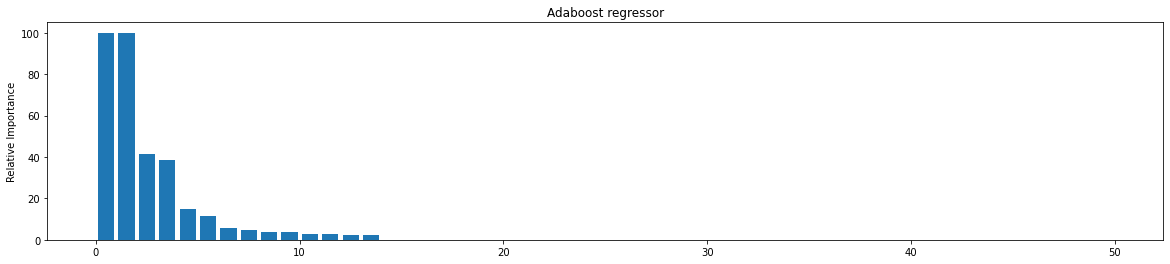

['C2H4O2' 'C8H8O' 'C9H10O2' 'C9H18O' 'C8H16O2' 'C15H30O' 'C12H24O2'
 'C10H20O2' 'C7H14O2' 'C4H10O' 'C4H8O2' 'C10H8' 'C18H36O2' 'C6H12O2'
 'C7H14O2' 'C9H18O2' 'C10H20O2' 'C6H12O2' 'C12H24O2' 'C11H14O2' 'C5H10O2'
 'C6H12O2' 'C11H22O2' 'C16H32O2' 'C8H16O2' 'C7H14O2' 'C14H28O2' 'C9H18O2'
 'C10H12O2' 'C5H10O3' 'C9H20O' 'C9H18O2' 'C9H18O' 'C5H12O' 'C8H10O'
 'C7H8O2' 'C6H6O2' 'C11H10' 'C6H12O' 'C5H10O' 'C5H4O2' 'C8H16O2' 'C7H6O'
 'C7H14O' 'C11H22O' 'C10H12O2' 'C8H14O4' 'C8H18O' 'C8H16O3' 'C7H14O2']


In [75]:
plot_feature_importances(abc.feature_importances_,'Adaboost regressor',f_name) 

In [76]:
#Permutation Importance
#如果随机打乱验证数据某一列的值，保持目标列以及其它列的数据不变，那么这种操作会在这些打乱的数据上对预测准确率产生怎样的影响

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(abc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = f_name)

Weight,Feature
0.1542 ± 0.0798,C8H8O
0.1157 ± 0.0582,C2H4O2
0.1084 ± 0.0305,C9H18O
0.0458 ± 0.0415,C9H10O2
0.0193 ± 0.0118,C12H24O2
0.0169 ± 0.0361,C15H30O
0.0072 ± 0.0118,C18H36O2
0.0072 ± 0.0193,C7H14O2
0.0048 ± 0.0118,C6H12O2
0.0024 ± 0.0096,C4H10O
